<a href="https://colab.research.google.com/github/PremGorecki/NeuralNetwork/blob/main/01_intro/01_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Przygotowanie środowiska do pracy z Tensorflow 2.0.
# Jeśli otrzymasz błąd podczas instalacji Tensorflow uruchom tę komórkę raz jeszcze.

!pip uninstall -y tensorflow
!pip install -q tensorflow==2.0.0

Found existing installation: tensorflow 2.0.0
Uninstalling tensorflow-2.0.0:
  Successfully uninstalled tensorflow-2.0.0


1.1 Import bibliotek

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data #zbiór mnist wbudowany w bibliotekę keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#Opcje do printowania tablic numpy
np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.0.0


1.2 Załadowanie i przygotowanie danych

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [ ]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [ ]:
# standaryzujemy aby szybciej się uczyło i nie było skrzywienia (bias'u)

X_train = X_train / 255
X_test = X_test / 255

In [ ]:
print(X_train[0])

[[0.             0.             0.             0.             0.             0.             0.
  0.             0.             0.             0.             0.             0.             0.
  0.             0.             0.             0.             0.             0.             0.
  0.             0.             0.             0.             0.             0.             0.            ]
 [0.             0.             0.             0.             0.             0.             0.
  0.             0.             0.             0.             0.             0.             0.
  0.             0.             0.             0.             0.             0.             0.
  0.             0.             0.             0.             0.             0.             0.            ]
 [0.             0.             0.             0.             0.             0.             0.
  0.             0.             0.             0.             0.             0.             0.
  0.             0.     

1.3 Eksploracja danych

(-0.5, 27.5, 27.5, -0.5)

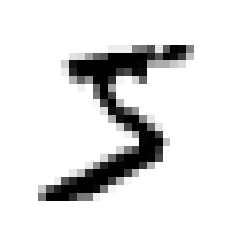

In [ ]:
# wyświetlamy ten obrazek
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

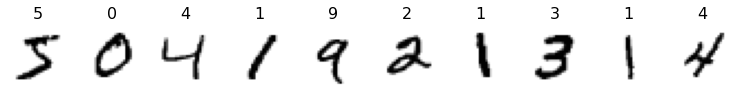

In [ ]:
# kilka wyświetlimy sobie
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='black', fontsize=16)
plt.show()

1.4 Budowa sieci neuronowej

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizers='adam', # optymalizator
              loss='sparse_categorical_crossentropy', # funkcja straty którą optymalizator wykorzystuje
              metrics=['accuracy']) # metryka

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


1.5 Trenowanie modelu

In [ ]:
history = model.fit(X_train, y_train, epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 12s 199us/sample - loss: 0.2969 - accuracy: 0.9128
Epoch 2/15
60000/60000 [==============================] - 14s 236us/sample - loss: 0.1535 - accuracy: 0.9554
Epoch 3/15
60000/60000 [==============================] - 14s 236us/sample - loss: 0.1248 - accuracy: 0.9648
Epoch 4/15
60000/60000 [==============================] - 8s 131us/sample - loss: 0.1084 - accuracy: 0.9696
Epoch 5/15
60000/60000 [==============================] - 7s 120us/sample - loss: 0.1013 - accuracy: 0.9722
Epoch 6/15
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0958 - accuracy: 0.9743
Epoch 7/15
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0889 - accuracy: 0.9765
Epoch 8/15
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0843 - accuracy: 0.9780
Epoch 9/15
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0828 - accuracy: 0.9789
Ep

1.6 Ocena modelu

In [ ]:
model.evaluate(X_test, y_test, verbose=2)

10000/1 - 1s - loss: 0.0531 - accuracy: 0.9799


[0.1062710982376716, 0.9799]

In [ ]:
# metryki wrzucamy do DataFram
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.296921,0.912783
1,0.153539,0.955450
2,0.124843,0.964817
3,0.108373,0.969600
4,0.101309,0.972233
5,0.095788,0.974250
6,0.088868,0.976483
7,0.084253,0.977983
8,0.082774,0.978900
9,0.079078,0.980000


In [ ]:
# wykres jak wyglądał proces naszego trenowowania
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800)

1.7 Predykcja na podstawie modelu

In [ ]:
model.predict(X_test)

array([[0.            , 0.            , 0.            , ..., 1.            , 0.            , 0.000000000001],
       [0.            , 0.            , 1.            , ..., 0.            , 0.            , 0.            ],
       [0.00000000001 , 0.9999943     , 0.000000349364, ..., 0.000000688532, 0.000004584736, 0.000000002219],
       ...,
       [0.            , 0.            , 0.            , ..., 0.000000004327, 0.000000002417, 0.000000014349],
       [0.            , 0.            , 0.            , ..., 0.            , 0.00000003641 , 0.            ],
       [0.            , 0.            , 0.            , ..., 0.            , 0.            , 0.            ]],
      dtype=float32)

In [ ]:
y_pred = model.predict_classes(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
# teraz łączymy predykcje z danymi testowymi
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [ ]:
# filtrujemy te które się różnią
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Int64Index([115, 247, 259, 321, 340, 359, 381, 391, 445, 582], dtype='int64')

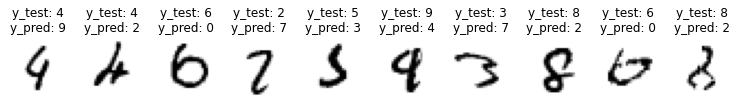

In [ ]:
plt.figure(figsize=(13, 13))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title('y_test: ' + str(y_test[j]) + '\n' + 'y_pred: ' + str(y_pred[j]), color='black', fontsize=12)
plt.show()